In [1]:
%load_ext autoreload
%autoreload 2

# Bootstrap

In [2]:
cache = dict()

In [37]:
from price_detector_fa.samples import *
from price_detector_fa.utils import *
from price_detector_fa.extractors import *
from price_detector_fa.preprocessing import *
from price_detector_fa.hardcoded import *

# Tests

## `preprocess`

In [25]:
preprocess(sample_5)

ic| text: ('ولی ما هرکیلو ماکارونی را فقط ۰.۳۵ $ فروخته ایم، در حالی که قیمت جهانی '
           'هرکیلو گندم بیش ۰.۴$ است.')


['ولی',
 'ما',
 'هرکیلو',
 'ماکارونی',
 'را',
 'فقط',
 '۰.۳۵',
 'دلار',
 'فروخته_ایم',
 '،',
 'در',
 'حالی',
 'که',
 'قیمت',
 'جهانی',
 'هرکیلو',
 'گندم',
 '۰.۴',
 'دلار',
 'است',
 '.']

## subject_extract

In [45]:
subject_extract(parser.parse(preprocess(sample_13)))

ic| text: 'هندوانه هر کیلو سه هزار تومان به فروش میرسد.'


[{'nodes': [{'address': 1,
    'word': 'هندوانه',
    'lemma': 'هندوانه',
    'ctag': 'N',
    'tag': 'N',
    'feats': '_',
    'head': 9,
    'deps': defaultdict(list, {'MOZ': [3]}),
    'rel': 'SBJ'},
   {'address': 2,
    'word': 'یک',
    'lemma': 'یک',
    'ctag': 'NUM',
    'tag': 'NUM',
    'feats': '_',
    'head': 3,
    'deps': defaultdict(list, {}),
    'rel': 'NPREMOD'},
   {'address': 3,
    'word': 'کیلو',
    'lemma': 'کیلو',
    'ctag': 'N',
    'tag': 'N',
    'feats': '_',
    'head': 1,
    'deps': defaultdict(list, {'NPREMOD': [2]}),
    'rel': 'MOZ'}]}]

## All Together

هندوانه هرکیلو سه هزار تومان به فروش میرسد.
ic| text: 'هندوانه هر کیلو سه هزار تومان به فروش میرسد.'
ic| s_chunks: '[هندوانه NP] [یک کیلو NP] [سه هزار تومان NP] [به PP] [فروش NP] [میرسد VP] .'


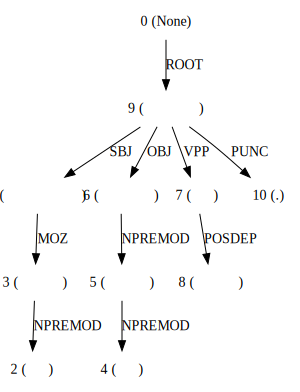

ic| extracted_show(price_extracted): ['مقدار:  سه هزار تومان']
ic| extracted_show(unit_extracted): ['مقدار:  یک کیلو']
ic| product_name_extracted: [{'nodes': [{'address': 1,
                                         'ctag': 'N',
                                         'deps': defaultdict(<class 'list'>, {'MOZ': [3]}),
                                         'feats': '_',
                                         'head': 9,
                                         'lemma': 'هندوانه',
                                         'rel': 'SBJ',
                                         'tag': 'N',
                                         'word': 'هندوانه'}]}]
    extracted_show(product_name_extracted): ['مقدار:  هندوانه']



In [44]:
from price_detector_fa.samples import *

for s in (
    # sample_1,
    # sample_2,
    # sample_2_1,
    # sample_2_2,
    # sample_2_3,
    # sample_2_4,
    # sample_2_5,
    # sample_2_6,
    # sample_2_7,
    # sample_2_8,
    # sample_2_9,
    # sample_2_9_2,
    # sample_3,
    # sample_4,
    # sample_5_e,
    # sample_6,
    # sample_7,
    # sample_8,
    # sample_8_2,
    # sample_8_3,
    sample_13,
    # *samples_evil,
    # *samples,
):
    print(s)
    if True or s not in cache:
        #: @todo6/Hoseini fix the return types
        s_tokens = preprocess(s)

        s_parsed = parser.parse(s_tokens)
        s_tagged = tagger.tag(s_tokens)
        s_chunks = tree2brackets(chunker.parse(s_tagged))
        cache[s] = dict(
            s_tokens=s_tokens,
            s_parsed=s_parsed,
            s_tagged=s_tagged,
            s_chunks=s_chunks,
        )
    s_cached = cache[s]
    s_tokens = s_cached["s_tokens"]
    s_parsed = s_cached["s_parsed"]
    s_tagged = s_cached["s_tagged"]
    s_chunks = s_cached["s_chunks"]
    ic(s_chunks)

    display(s_parsed)
    all_extract(s_parsed)
    print()